# **AP155 Lab Assignment**
## Module 4: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Hernandez, Red Christian\
_Student No._: 2022-03646\
_Section_: THV-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Red Christian Hernandez**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/50
* Problem 2 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(25 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$.

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(25 pts.)*

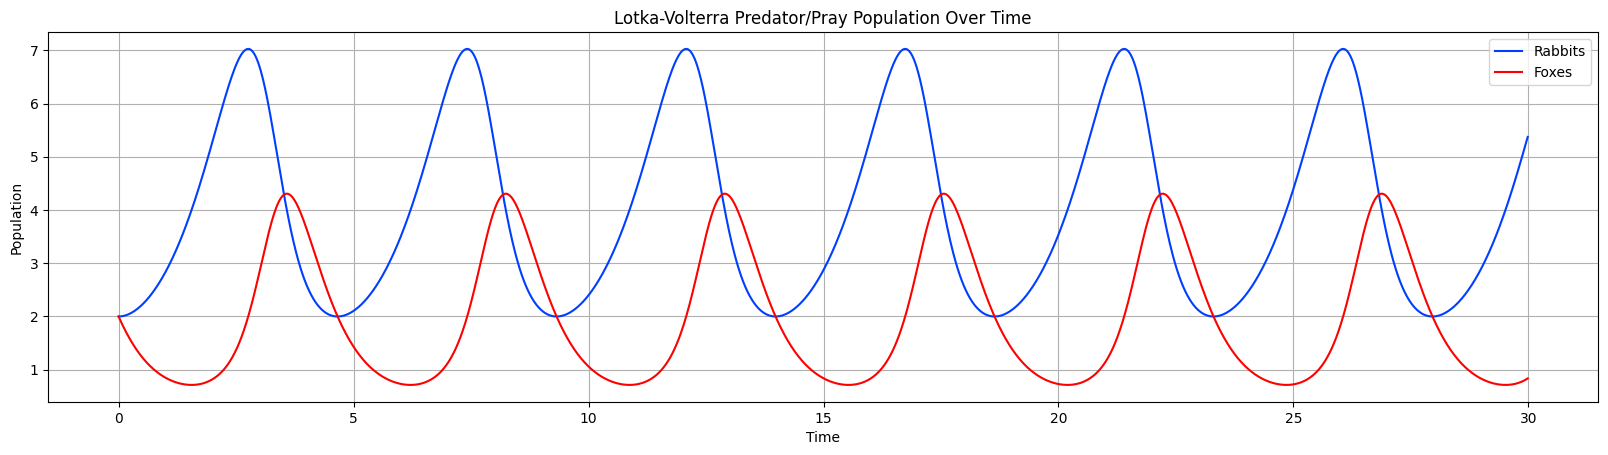

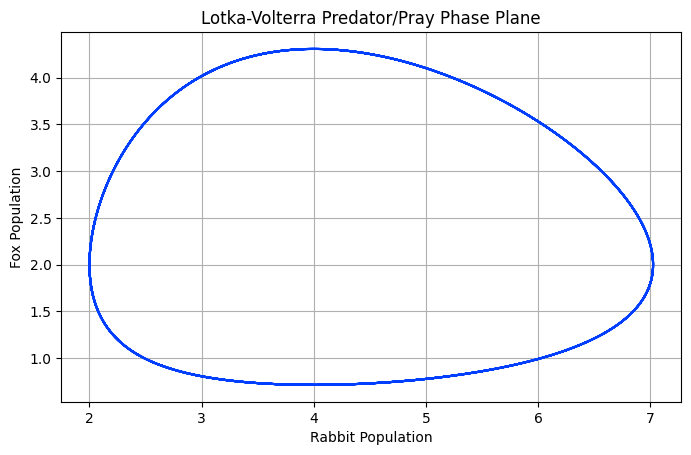

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# We set the initial conditions
α = 1 # growth rate of prey
β = 0.5 # rate of predators consumption of prey
γ = 0.5 # rate of growth of predator due to prey consumption
δ = 2 # death rate of predator

# We define the given function as follows:
def f(r,t):
  x = r[0] # current population of prey
  y = r[1] # current population of predator
  fx = α*x - β*x*y # rate of change of prey
  fy = γ*x*y - δ*y # rate of change of predator
  return np.array([fx,fy],float) # return the rate of change of prey and predator

# we define the range of interval [0,30]
a = 0.0
b = 30.0
N = 2000 # number of steps
h = (b-a)/N # step size

x_points = [] # we define an empty array for the population of prey over time (rabbit)
y_points = [] # we define an empty array for the population of predator over time (fox)
t_points = np.arange(a,b,h) # we define an array of time points spaced by step size given the interval

r = np.array([2.0,2.0],float) # set the initial condition of the population of both prey and predator

# for each given time point we iterate to calculate the 4 RK coefficients for the population of prey and predator
for t in t_points:
  x_points.append(r[0]) # we append the current value of prey
  y_points.append(r[1]) # we append the current value of predator

  k1 = h*f(r,t) # first rk coefficient
  k2 = h*f(r+0.5*k1,t+0.5*h) # second rk coefficient
  k3 = h*f(r+0.5*k2,t+0.5*h) # third rk coefficient
  k4 = h*f(r+k3,t+h) # fourth rk coefficient
  r += (k1+2*k2+2*k3+k4)/6

# We make a plot of the population of prey and predator over time
plt.style.use('seaborn-v0_8-bright') # plot style
plt.figure().set_figwidth(20) # figure width
plt.title("Lotka-Volterra Predator/Pray Population Over Time") # title
plt.xlabel("Time") # x-label
plt.ylabel("Population") # y-label
plt.plot(t_points, x_points, label="Rabbits") # plot for the population of prey (rabbits) over time
plt.plot(t_points, y_points, label="Foxes", color = 'red') # plot for the population of predator (foxes) over time
plt.legend(['Rabbits', 'Foxes']) # we declare a legend
plt.grid() # show grid
plt.show() # show plot

# We make a plot of the population of
plt.style.use('seaborn-v0_8-bright') # plot style
plt.figure().set_figwidth(8) # figure width
plt.title("Lotka-Volterra Predator/Pray Phase Plane") # title
plt.xlabel("Rabbit Population") # x-label
plt.ylabel("Fox Population") # y-label
plt.plot(x_points, y_points) # plot for the population of prey and predator
plt.grid() # show grid
plt.show() # show plot

**Population Dynamics of Predator/Prey Over Time**

This illustrates a cyclical pattern beginning with the rise of the population of the prey due to reproduction (α*x), this reproduction is then limited by the consumption of predators (- β*x*y). The surplus in prey then translates to the increase of the population of the predators due to increased food supply (γ*x*y). The contiuous depletion of food supply and the natural death rate of the predator (- δ*y) causes the decrease in population of the predators which then increases the population of prey and the cyclic behaviour continues. illustrating a dynamic yet predictable pattern or cycle.

This also illustrates the interdependence between prey and predator and highlights the importance of each species to another species ecosystem for their survival.

**Phase Plane of Prey/Predator**

The second plot illustrates an elliptical closed shape showcasing the predictable and cyclic relationship between the prey and predator emphasising the interdependence of one to another. Thus in ideal conditions, the population of prey/predator will never ideally be overpopulated or get extinct. emphasizing the natural and periodic balance between predator/prey


### PROBLEM 2

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(25 pts.)*

2. Make a graph of $\theta$ as a function of time. *(25 pts.)*


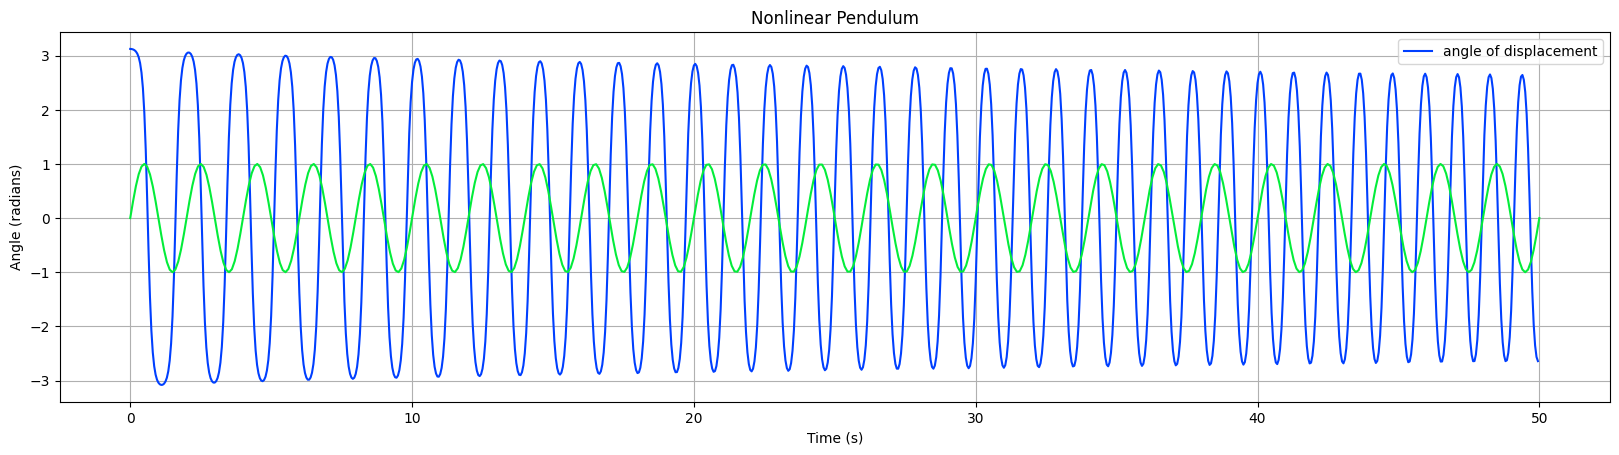

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

# we define our initial conditions
g = 9.81 # acceleration due to gravity
I = 0.1 # legnth of pendulum in meters

theta_0 = math.radians(179)  # initial angle converted to radians
omega_0 = 0.0  # intial angular velocity

def f(r,t): # we define a function that returns the derivative of the angular velocity (theta) and angular velocity (omega)
# r represents the state of the system at any point t
  theta = r[0] # angle of pendulum
  omega = r[1] # angulat velocity
  ftheta = omega # rate of change of the angle
  fomega = -(g/I)*np.sin(theta) # rate of change of the angular velocity
  return np.array([ftheta,fomega],float) # we return an array containing rate of change of angle and angular velocity

# we define the range of interval [0,30]
a = 0.0
b = 50
N = 1000  # number of steps
h = (b - a) / N  # step size

r = np.array([theta_0,omega_0],float) # we define the initial state of the pendulum with the initial angle and initial angular velocity
omega_points = [] # we define an empty array for the values of the angle of the pendulum over time
theta_points = [] # we define an empty array for the values of the angular velocity of the pendulum over time
t_points = np.arange(a,b,h)  # we define an array of time points

# for each given time point we iterate to calculate the 4 RK coefficients angle and angular velocity
for t in t_points:
    theta_points.append(r[0]) # we append the current value of the angle of the pendulum
    omega_points.append(r[1]) # we append the current value of the angular velocity

    k1 = h * f(r,t) # first rk coefficient
    k2 = h * f(r+0.5*k1,t+0.5*h) # second rk coefficient
    k3 = h * f(r+0.5*k2,t+0.5*h) # third rk coefficient
    k4 = h * f(r+k3,t+h) # 4th rk coeffiecient
    r += (k1+2*k2+2*k3+k4)/6 # weighted average of the rk coefficients

x = np.linspace(0, 50, 500) # we define a array of equally spaced numbers from 0 to 10
y = np.sin(x*math.pi) # we multiply the integer values inputed into the sin function by pi

# Plotting theta as a function of time
plt.style.use('seaborn-v0_8-bright') # plot style
plt.figure().set_figwidth(20) # figure width
plt.plot(t_points, theta_points, label= 'angle of displacement') # we plot the values of theta with respect to time
plt.plot(x, y) # we plot the sin function
plt.title("Nonlinear Pendulum") # plot title
plt.xlabel("Time (s)") # x-label
plt.ylabel("Angle (radians)") # y-label
plt.grid(True) # grid
plt.legend() # legend
plt.show() # show plot

The graph showcases the differing qualities of a non linear pendulum undergoing large oscillations compared to pendulums with small initial angles that underwent small angle approximation.

The graph of the nonlinear pendulum illustrates a non sinusoidal, oscillatory behaviour with a longer period and a steeper form unlike its small angle counterpart, which could be observed from a simple real life pendulum. When a pendulum with a ball attached is released at a much steeper angle with the same arm length, the ball would take much longer, and swing faster than the ball swinging at a smaller angle.

The graph also illustrates gradually decreasing amplitude even though there is no introduced damping constant. This due to the fact that RK is non energy conserving.